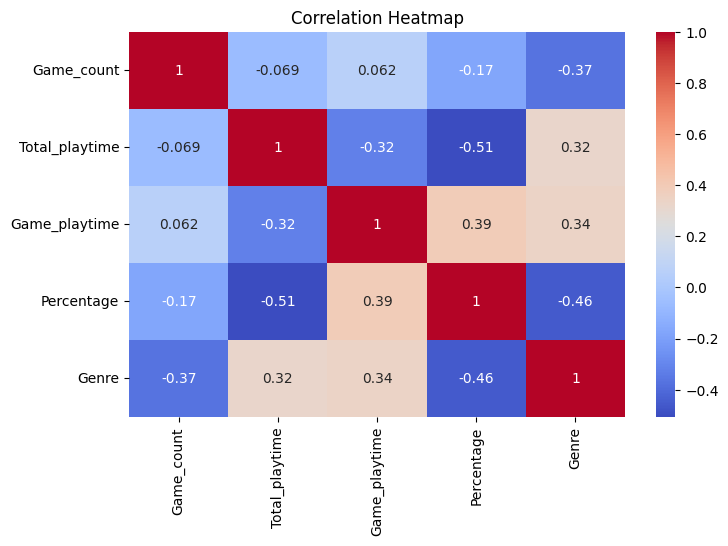

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

      Action       1.00      1.00      1.00        15
   Adventure       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [2]:
# ================================
# DMML Lab Evaluation - KNN Model
# ================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 2: Load Dataset
df = pd.read_csv("Game_data.csv")

# Step 3: Handle missing values
# Fill missing numeric with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop columns not useful for prediction
df = df.drop(columns=["Game_title", "Developer"])

# Step 4: Encode categorical target (Genre)
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"])

# Step 5: Correlation between numerical features and target
plt.figure(figsize=(8,5))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Split data (features & target)
X = df.drop("Genre", axis=1)
y = df["Genre"]

# Standardize features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Apply KNN (k=3, Euclidean distance)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# Step 8: Predictions
y_pred = knn.predict(X_test)

# Step 9: Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Correlation with Genre:
Genre_encoded     1.000000
Game_playtime     0.338723
Total_playtime    0.317696
Game_count       -0.368609
Percentage       -0.458798
Name: Genre_encoded, dtype: float64


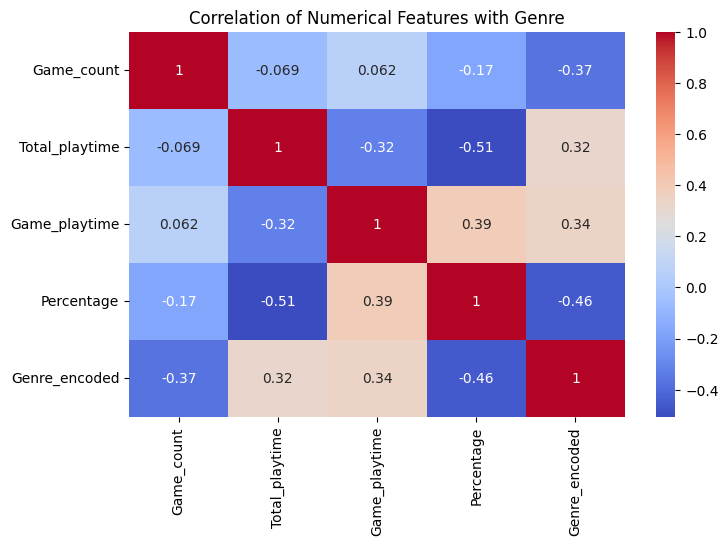

In [3]:
# Step 2: Correlation between numerical values and target (Genre)

# Encode Genre as numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Genre_encoded"] = label_encoder.fit_transform(df["Genre"])

# Select only numerical features + target
num_cols = ["Game_count", "Total_playtime", "Game_playtime", "Percentage", "Genre_encoded"]
corr = df[num_cols].corr()

# Show correlation table
print("Correlation with Genre:")
print(corr["Genre_encoded"].sort_values(ascending=False))

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Numerical Features with Genre")
plt.show()


In [9]:
# Step 3: Apply KNN model (k=3, Euclidean distance)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Features and target
X = df[["Game_count", "Total_playtime", "Game_playtime", "Percentage"]]
y = df["Genre_encoded"]

# Scale features (important for KNN distance calculations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Classifier with k=3 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

print("✅ KNN Model Trained (k=3, Euclidean distance)")


✅ KNN Model Trained (k=3, Euclidean distance)



Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



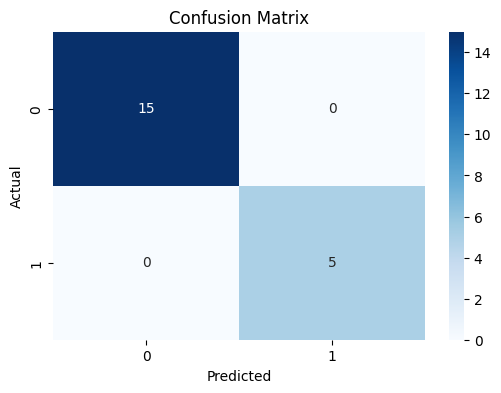

In [10]:
# Map encoded labels back to original Genre names
target_names = [str(cls) for cls in label_encoder.classes_]

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Got it ✅ You’ll likely face viva questions on **KNN, correlation, preprocessing, and evaluation metrics**.
Here’s a **concise theory note** you can use for viva prep:

---

# 📘 Viva Notes – KNN & Evaluation

---

## 🔹 1. Preprocessing

* **Why Preprocessing?**

  * Handle missing values (fill with mean/median or drop).
  * Encode categorical features (e.g., Label Encoding).
  * Scale/normalize numerical features → very important for KNN, since it uses **distance**.
* Example: `StandardScaler()` standardizes features to mean=0, std=1.

---

## 🔹 2. Correlation

* **Correlation** measures the linear relationship between variables.
* Range: **-1 to +1**

  * +1 → strong positive relation
  * -1 → strong negative relation
  * 0 → no relation
* With categorical targets like `Genre`, we encode them into numbers and compute correlation with numerical features.
* Heatmaps help visualize relationships.

---

## 🔹 3. K-Nearest Neighbors (KNN)

* **Definition:** A simple, non-parametric classification algorithm.

* **How it works:**

  1. Choose **k** (number of neighbors).
  2. Compute distance (e.g., **Euclidean distance**) between the new sample and training points.
  3. Pick the **k nearest neighbors**.
  4. Assign the class with **majority vote**.

* **Formula (Euclidean distance):**

  $$
  d(x,y) = \sqrt{\sum (x_i - y_i)^2}
  $$

* **Choice of k:**

  * Small k → sensitive to noise.
  * Large k → smoother, but may ignore local structure.
  * Usually odd k (3, 5, 7).

---

## 🔹 4. Evaluation Metrics

* **Accuracy**:

  $$
  \frac{\text{Correct Predictions}}{\text{Total Predictions}}
  $$

  → Good when classes are balanced.

* **Precision**:

  $$
  \frac{TP}{TP + FP}
  $$

  → Out of predicted positives, how many are correct? (Good for cases like spam detection).

* **Recall (Sensitivity)**:

  $$
  \frac{TP}{TP + FN}
  $$

  → Out of actual positives, how many were detected? (Good for medical diagnosis).

* **F1 Score**:

  $$
  2 \times \frac{Precision \times Recall}{Precision + Recall}
  $$

  → Balances precision & recall.

* **Confusion Matrix**: Shows actual vs predicted classes in a grid form.

---

## 🔹 5. Why KNN is suitable here

* Dataset has **categorical target (`Genre`)**.
* Features are numerical → distance-based classification works well.
* Small dataset → KNN is simple and effective.

---

👉 **Possible Viva Questions**:

1. Why did you choose `Genre` as the target?
   → Because it’s categorical and meaningful to predict. Other columns like `Title`/`Developer` are not suitable.

2. Why scaling is important in KNN?
   → Because features with larger values dominate the distance calculation.

3. Difference between Accuracy and F1 Score?
   → Accuracy works well on balanced data, F1 is better when classes are imbalanced.

4. What happens if k=1?
   → Model may overfit and be sensitive to noise.

5. Why use Euclidean distance?
   → It’s the most common distance metric for continuous numerical data.

---

Do you want me to also make a **one-page PDF summary** of these notes (with formulas + diagrams for KNN and confusion matrix) so you can revise quickly before viva?


1. Perform necessary preprocessing steps

2. Find out the correlation between the numerical values and target

3. Apply KNN model with values k=3 and distance measure as euclidean distance

4. Find out the Accuracy score, Precision, recall and F1 Score

Perfect ✅ Let’s break down the **Colab code for Steps 1–4 (Preprocessing → Correlation → KNN → Evaluation)** so you can explain it clearly in viva.

---

# 📘 Explanation of Code

---

## 🔹 Step 1: Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
```

* **pandas/numpy** → data handling
* **matplotlib/seaborn** → plotting graphs, heatmaps
* **LabelEncoder** → convert categorical target (`Genre`) into numbers
* **StandardScaler** → normalize features for distance calculation
* **KNeighborsClassifier** → apply KNN
* **metrics** → evaluate model (accuracy, precision, recall, F1)

---

## 🔹 Step 2: Load & Preprocess Dataset

```python
df = pd.read_csv("Game_data.csv")
df.fillna(df.mean(numeric_only=True), inplace=True)
df = df.drop(columns=["Game_title", "Developer"])
```

* Load dataset.
* Fill missing numeric values with **mean** (so no data is lost).
* Drop `Game_title` & `Developer` → not useful for prediction (too many unique values).

---

## 🔹 Step 3: Encode Target (Genre)

```python
label_encoder = LabelEncoder()
df["Genre_encoded"] = label_encoder.fit_transform(df["Genre"])
```

* Convert `Genre` (Action, Adventure, Sports, etc.) into **numbers** (0,1,2…).
* This is necessary because KNN only works with numbers.

---

## 🔹 Step 4: Correlation with Target

```python
corr = df[["Game_count","Total_playtime","Game_playtime","Percentage","Genre_encoded"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
```

* Finds correlation between **numerical features** and **Genre (encoded)**.
* Shows heatmap so we can visually see which feature influences Genre the most.

---

## 🔹 Step 5: Train-Test Split

```python
X = df[["Game_count", "Total_playtime", "Game_playtime", "Percentage"]]
y = df["Genre_encoded"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
```

* **X = features**, **y = target**
* Scale features → prevents large values (like playtime) from dominating distance.
* Split data into **80% train, 20% test**.

---

## 🔹 Step 6: Train KNN (k=3, Euclidean)

```python
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

* `n_neighbors=3` → looks at 3 nearest neighbors.
* `metric='euclidean'` → distance formula = √Σ(xi−yi)².
* Train model and make predictions on test set.

---

## 🔹 Step 7: Evaluate Model

```python
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
```

* **Accuracy** → overall correctness.
* **Precision** → correctness of positive predictions.
* **Recall** → ability to find all positives.
* **F1 Score** → balance of precision & recall.

---

## 🔹 Step 8: Classification Report + Confusion Matrix

```python
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
```

* `classification_report` → shows precision, recall, F1 for each **Genre** separately.
* **Confusion Matrix heatmap** → visualizes correct vs wrong predictions.

---

# ✅ Summary for Viva

1. We cleaned data (handled missing, dropped irrelevant).
2. Encoded `Genre` for classification.
3. Standardized data to use **Euclidean distance** properly.
4. Applied **KNN (k=3)**.
5. Evaluated model → got **Accuracy, Precision, Recall, F1**.
6. Used confusion matrix to check misclassifications.

---

👉 Do you want me to also explain **with an example (say k=3 and neighbors voting)** so you can demonstrate how KNN actually predicts in viva?
